# Post Test 6 | Unsupervised Learning
#### Nama   : Novia Indah Ramadhani
#### NIM    : 2109106041
#### Kelas  : A2 2021
### Dataset : Brain Stroke
#### Link   : https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Import Library

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [79]:
warnings.filterwarnings('ignore')

# Import Dataset

In [104]:
dataset = pd.read_csv("brain_stroke.csv")

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Melihat Data Bernilai NULL dan Data Bernilai Duplikat

In [82]:
print("Cek data dengan nilai NULL :")
dataset.isna().sum()

Cek data dengan nilai NULL :


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [83]:
print ("Cek data duplikat :")
dataset.duplicated().sum()

Cek data duplikat :


0

## Penskalaan Dataset (Data Scaling & Pembuatan Subset)

In [84]:
# Peprosesing
from sklearn.preprocessing import StandardScaler

In [85]:
df_subset = dataset[['age', 'bmi']]

In [86]:
ss = StandardScaler()

In [87]:
x_scaled = ss.fit_transform(df_subset)

# Algoritma K-Means

In [88]:
from sklearn.cluster import KMeans

#### Dibuat 4 clusters, karena terdapat 4 kategori pada 'work_type'

In [105]:
model_kmeans = KMeans(n_clusters = 4, random_state = 0)

In [106]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=0)

In [91]:
# Untuk liat siapa aja yang udah dijadiin label
labels = model_kmeans.labels_
print(labels)

[0 3 0 ... 2 2 3]


## Evaluasi KMeans dengan Cross Tab
#### Untuk membandingkan antar cluster

In [92]:
# Tabel tabulasi silang

df_kmeans = pd.DataFrame({'labels' : labels, 'work_type' : dataset.work_type})

In [93]:
ct = pd.crosstab(df_kmeans['labels'], df_kmeans['work_type'])

print(ct)

work_type  Govt_job  Private  Self-employed  children
labels                                               
0               162      666            166         6
1                18      260             15       619
2               214     1020            148        48
3               250      914            475         0


## Menampilkan Centroid pada tiap Cluster

In [94]:
import matplotlib.pyplot as plt

In [95]:
xs = x_scaled[:, 0]
ys = x_scaled[:,1]

In [96]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

## Visualisasi Centroid

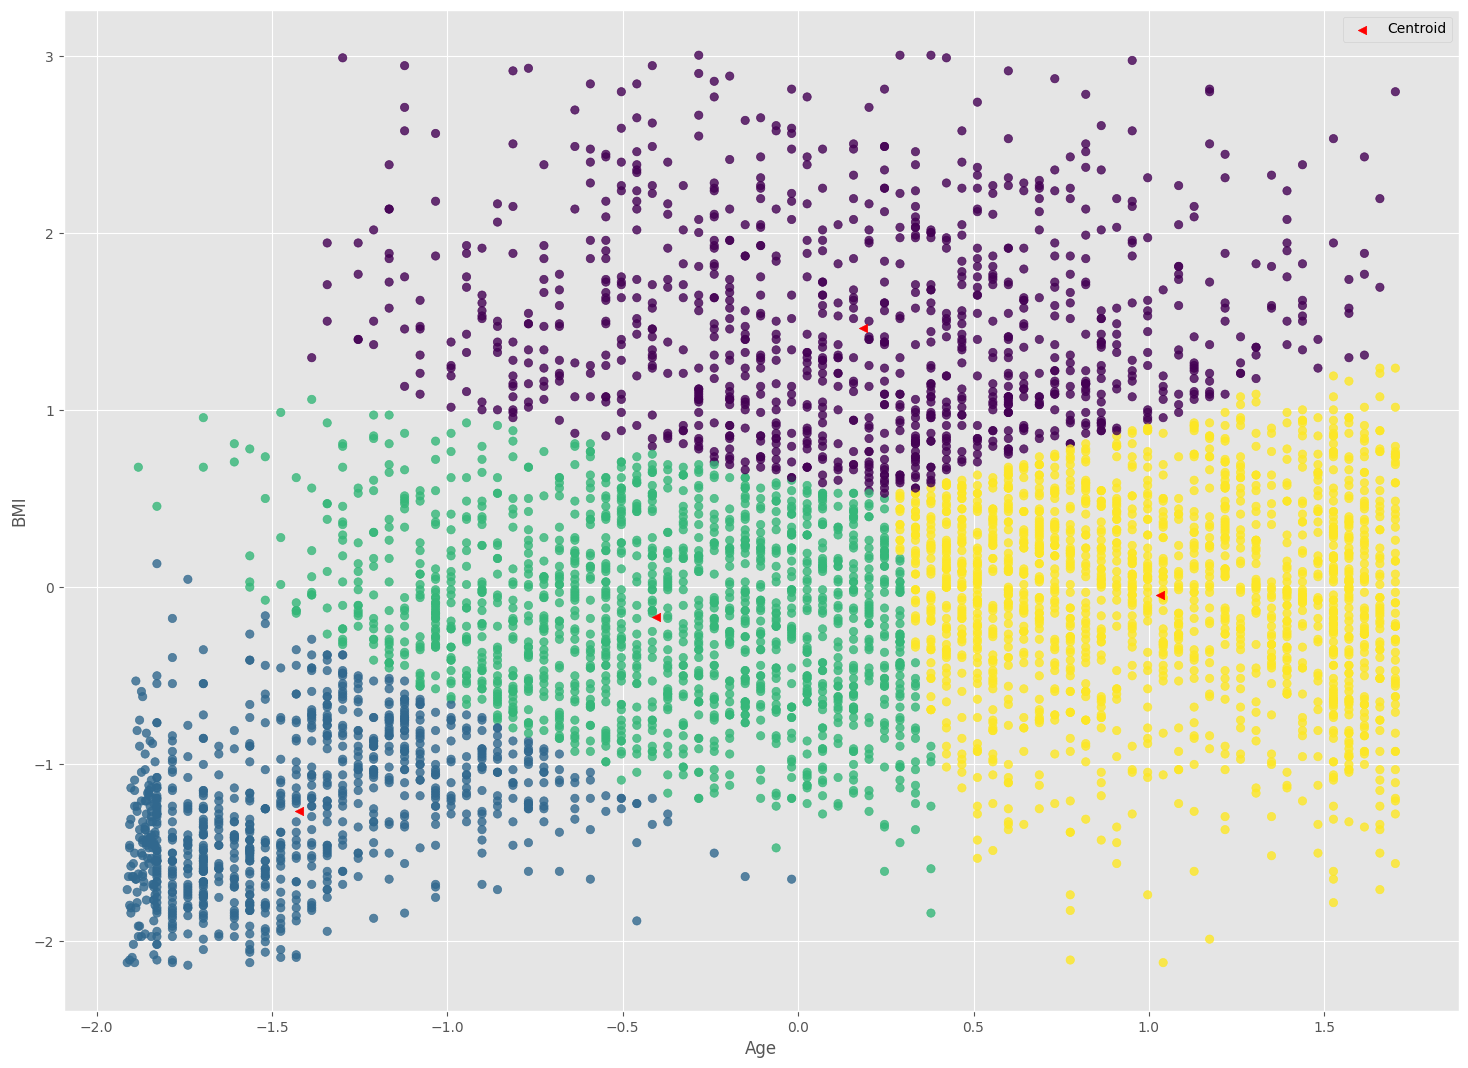

In [113]:
plt.style.use('ggplot')
plt.figure(figsize=(18,13))

plt.scatter(
    xs, 
    ys, 
    c = labels, 
    alpha = 0.8
)
plt.scatter(
    centroids_x, 
    centroids_y, 
    c = "red", 
    marker = '<', 
    label = "Centroid"
)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend()
plt.show()

## Visualisasi Inertia

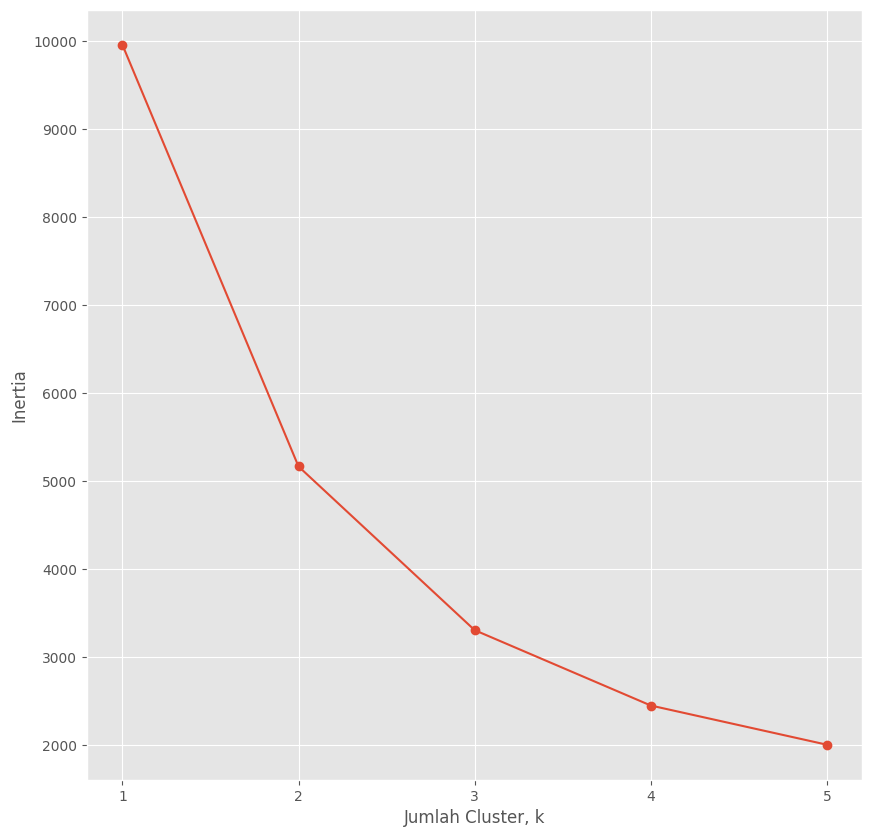

In [108]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias (seberapa bagus dia clusteringnya)
# Jadi cluster yang baik model nya dikit dan inertianya juga banyak
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

## Evaluasi

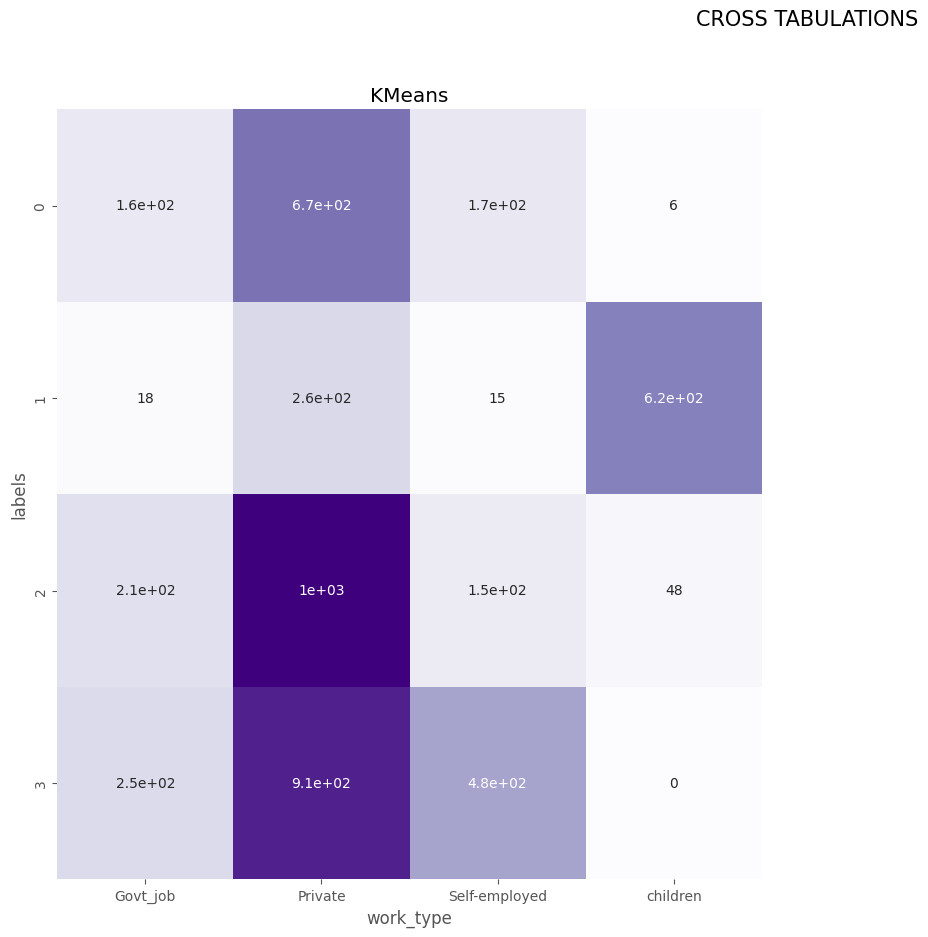

In [99]:
plt.figure(figsize=(20,10))
plt.suptitle("CROSS TABULATIONS", fontsize = 15)

#KMeans
plt.subplot(1, 2, 1)
plt.title("KMeans")
sns.heatmap(ct, annot = True, cbar = False, cmap = "Purples")

plt.show()